# **랭그래프**(**LangGraph**)

## 랭그래프란(LangGraph)

- **LangGraph**는 LangChain 생태계에서 개발된 **그래프구조 기반 워크플로우 및 에이전트 개발을 위한 런타임 프레임워크**이다.
- LangGraph는 선형적 흐름이 아닌 **비선형적인 복잡한 흐름 구조의 AI 에이전트 애플리케이션을 견고하고 재현 가능하게**(**build reliable**) 구성할 수 있도록 설계되었다.
- LangGraph의 가장 큰 특징은 **사이클**(**순환 구조**)을 지원한다는 점이다. 이는 특정 조건에 따라 이전 단계로 돌아가거나 다른 경로를 선택할 수 있음을 의미한다. 예를 들어, 검색 결과가 만족스럽지 않을 때 다시 검색을 수행하거나, 답변의 품질이 낮을 때 재생성을 요청하는 등의 복잡한 로직을 구현할 수 있다.

> **그래프**(**Graph**) **구조**
> - 데이터를 저장하고 조직화하는 자료구조 중 하나로 **데이터 간의 관계를 중심으로 정보를 표현하는 방식**의 자료구조다.
> - 데이터를 나타내는 **Node**(**노드**)와 Node와 Node를 연결하여 관계를 나타내는 **Edge**(**엣지**)로 데이터를 표현한다.
> - **트리**(**Tree**)는 루트를 중심으로 부모–자식(1:N) 위계를 구조적으로 강제하는 **계층적 관계의 자료구조**이다.
> - **그래프**(**Graph**)는 Node 간의 다대다(N:N) 관계를 edge 객체로 저장·연산에서 직접 다루는 비계층적 자료구조이며 수평적 관계까지 표현할 수 있다.


## LangGraph 핵심개념

- **그래프 기반 실행**: 애플리케이션의 실행 흐름을 **노드**(**node**)와 **엣지**(**edge**)로 구성된 그래프로 표현하여 분기, 병렬, 반복 구조를 자연스럽게 다룸.
- **상태 유지(stateful):** 실행 중인 에이전트의 상태(context)를 런타임이 관리하며 중단/재개 시에도 상태가 유지되도록 한다.
- **장기 실행(durable workflows):** 서버 재시작, 장시간 실행 등 프로덕션 조건에서도 상태를 유지하며 워크플로우를 이어갈 수 있는 기능 포함하고 있다.
- **멀티 에이전트 및 상호작용:** 여러 AI 에이전트가 협력하여 복잡한 작업을 수행할 수 있는 환경을 제공한다.




## 랭체인(LangChain)과의 관계

- *Langgraph는 LangChain의 기능을 확장하여 만들어진 프레임워크이다.* 
  - LangGraph는 LangChain에서 제공하는 여러 구성 요소(모델 호출, 도구 등)를 **low level에서 제어**할 수 있게 확장한 프레임워크이다.
    - LangGraph는 개발자가 모델 호출과 도구 실행 등의 순서, 조건에 따른 분기등을 직접 구성할 수 있다.
  - 필요 시 LangChain 에이전트를 LangGraph 워크플로우내의 Node로 사용할 수 있는 **상호 보완적 관계**이다.


### 비교

| 비교 항목            | **LangChain**                         | **LangGraph**                                     |  
| -------------------- | ------------------------------------- | ------------------------------------------------- | 
| 실행 흐름            | **선형/순차 중심** 워크플로우         | **그래프 기반** 복잡한 흐름 (분기·루프·상태 흐름) |
| 상태 관리            | 기본 메모리/세션 중심                 | **지속 상태(durable)**, 런타임 저장·복원          |
| 추상화 수준          | `LCEL`을 이용한**고수준(high-level)** API | **저수준(low-level)** 실행 제어               | 
| 적합한 용도          | 간단한 에이전트 & 워크플로우          | 복잡한 실행흐름의 멀티 에이전트, 상태 기반 시스템 등 |



# 랭그래프 기본 구조

## 노드(Node) 와 엣지(Edge)

랭그래프의 기본 구조는 **노드**(**Node)** 와 **엣지**(**Edge**) **노드**(**Node)**로 구성된다.

- **노드**(**Node**): 
  - 그래프 상의 처리 단위
  - 실제 작업을 수행하는 Python 함수들로, 각각의 노드는 특정 로직을 담당한다. 
  - 노드는 현재 상태를 입력으로 받아서 작업을 수행하고, 업데이트된 상태를 반환한다.
  - 예를 들어, LLM 호출, 문서 검색, 데이터 처리 등의 기능을 수행할 수 있다.

- **엣지**(**Edge**):
  -  노드 간의 연결을 정의하며, 다음에 어떤 노드를 실행할지 결정하는 역할을 한다. 
  -  엣지는 워크플로우의 **흐름을 제어**하고 조건부 라우팅을 통해 **분기, 반복**을 가능하게 한다.

## 상태(State)

- 상태(State)는 에이전트가 실행되는 동안 유지되는 메모리/상태다. 실행 중 모든 노드가 이 상태에 접근할 수 있으며, 작업 결과에 따라 상태를 업데이트할 수 있다. 
- 상태(State) Schema(구조)는 **TypedDict 또는 pydantic를 상속한 클래스로 정의**한다. Schema에는  State의 속성(Field)들을 설계한다.
- Agent **실행 중의 상태(State)는 Dictionary로 관리**되며, 스키마(schema)에 정의된 필드를 key로 가진다. (**스키마에 없는 field는 상태에 추가되지 않는다.**)
각 Node는 state 값을 읽어 사용하거나, 새로운 값을 추가·수정·병합(update)하여 다음 노드로 전달함으로써 상태를 변경한다. 

- **상태(State)의 주요 역할**
    - **전체 워크플로우의 컨텍스트 유지**
        -  에이전트가 여러 단계를 실행하는 동안 처리 과정에서 필요한 모든 정보를 한 곳(상태-dict)에서 관리한다
    - **노드 간 정보 공유**
        -  한 노드의 실행 결과를 state 필드에 저장하고, 다른 노드가 이를 조회해 사용하는 기능이다. 이를 통해 그래프 흐름에서 중간 데이터와 관계를 공유·재사용할 수 있다
    - **진행 상황 추적**
        -  에이전트가 현재 실행 중이거나 다음에 실행될 노드가 무엇인지, 이미 완료된 태스크는 무엇인지, 그리고 사용자 승인(HITL) 같은 의사결정 정보까지 state의 필드로 기록해 두는 기능. 
        -  이 정보들을 기반으로 그래프 실행 흐름을 조율하고, 조건 분기나 다음 단계 실행을 관리·추적할 수 있게 한다.


## StateGraph

- StateGraph는 랭그래프의 핵심 클래스로, 상태 기반의 계산 그래프를 정의하는 역할을 한다. StateGraph는 에이전트의 수명 주기 전반에 걸쳐 상태가 유지되도록 하며, 그래프의 노드들이 이 상태를 업데이트할 수 있게 한다.
- StateGraph의 초기화 과정(객체생성시)에서는 상태 정의 스키마를 받아서, 실행 시 Node들이 실행 결과를 dict로 반환하면 기존 상태(state)에 병합, 업데이트하여 전체 노드들이 공유할 수있도록 관리 한다.

## 랭그래프에서 상태관리

랭그래프에서 상태 관리는 두 가지 방식으로 이루어진다:

1. **완전 재정의 방식**:
   - 노드가 Field에 새 값을 반환하여 기존 값을 대체하는 방식이다. (다른 값으로 변경)
2. **업데이트 방식**: 
   - 기존 list와 같은 자료구조 타입의 Field에 새로운 값을 추가하는 방식이다. 예를 들어, 메시지 리스트에 새로운 메시지를 추가할 때 사용된다.

In [1]:
!uv pip install langgraph

Audited 1 package in 1.06s


# 랭그래프 구현

- **설치**
  - `pip install langgraph`
  
## 상태(State) 구조(schema) 정의

- 랭그래프를 구현하기 위해서는 먼저 State 클래스를 정의 한다.
  - State는 `TypedDict`, `pydantic.BaseModel`를 상속받아 정의한다.
    > **TypeDict**: Dictionary Type hint를 위한 클래스로 key와 key의 값의 타입을 정의한다.

  - class 변수로 Field들을 정의 한다.
    - type hint를 이용해 각 Field(key)가 어떤 타입의 값을 가질 지 선언한다. 
    - 리스트 병합 같은 결합 규칙이 필요한 필드는 `Annotated[..., reducer]` 형태로 reducer 함수를 지정한다.
    - Reducer는 field가 가진 기존 값에 노드가 추가한 새 값을 어떻게 결합할지 정의한다 (예: 리스트 추가, 값 덮어쓰기, 사용자 정의 병합 등)
  - State 클래스는 그래프 실행 전반에서 Node들이 공유/업데이트하는 상태 데이터의 스키마이며, 실제 실행 시 상태는 **Dictionary 인스턴스**로 관리된다.

    ```python
      from typing import TypedDict
      class MyState(TypedDict):
          counter: int
          messages: list 
    ```


## 노드 정의

- 노드는 실제 작업을 수행하는 Python 함수로 정의된다.  
- 각 노드 함수는 **현재 상태**를 입력으로 받아 처리 후 **업데이트된 상태**를 반환한다.
  - 처리결과를 State에 추가 한 것
  - 추가할 것이 없을 경우 None을 반환한다.

  ```python
  def increment_counter(state):    
      return {"counter": state["counter"] + 1} 
      
  def process_message(state):
      # 메시지 처리 로직    
      new_message = "처리된 메시지"    
      return {"messages": state["messages"] + [new_message]}
  ```


## 엣지 정의

- 엣지는 노드 간의 연결을 정의하며, `add_edge` 메서드를 사용하여 추가한다. 기본적인 엣지는 한 노드에서 다른 노드로의 직접적인 연결을 의미한다.

  ```python
  graph.add_edge("node1", "node2") 
  graph.add_edge("node2", "node3")
  ```

## 그래프 구성

- 노드와 엣지를 정의한 후에는 그래프를 구성하고 컴파일해야 한다. 
  - `StateGraph`를 생성하고 그래프에 노드들을 추가한다.
  - 각 노드들을 연결하여 엣지를 추가한다. 이 과정에서 시작점과 종료점을 설정한다.
  - 컴파일을 통해 그래프의 구조를 검증한다.

    ```python
    from langgraph.graph import START, END
    from langgraph.graph import StateGraph 

    # StateGraph 생성
    graph = StateGraph(MyState)

    # 노드 추가 
    graph.add_node("increment", increment_counter) 
    graph.add_node("process", process_message) 
    # 엣지 추가 
    graph.add_edge(START, "increment") 
    graph.add_edge("increment", "process") 
    graph.add_edge("process", END) 
    # 그래프 컴파일 
    app = graph.compile(
    ```


## 호출

- `invoke()` 와 `stream()` 을 이용해 호출한다.
  - 메소드 호출시 **초기 상태(Initial state)를 제공**하여 그래프를 실행한다. 
    - 그래프는 이 초기 상태부터 시작하여 정의된 노드들을 순차적으로 실행하며 상태를 업데이트한다.
  - **checkpointer 저장소(메모리)를 사용**할 경우 **thread-id를 RunnableConfig로 전달**한다.
    - **thread_id**는 LangGraph에서 **하나의 workflow(그래프) 실행 세션을 식별하기 위한 ID** 
    - 개별 실행(invoke()/stream() 호출)이 아닌 **전체 작업시작 ~ 종료**까지의 논리적 단위를 식별하는 ID이다. 
- **invoke(input, config)**
  - 그래프(워크플로우)를 한 번 실행하고 최종 State 결과만 반환한다.
    ```python
    result = app.invoke({"counter": 0, "messages": []}) 
    print(result)
    ```
- **stream(input, config)**
  - 그래프 실행 중 발생하는 이벤트를 실시간으로 yield(스트리밍)하여 반환한다. 이벤트는 보통 각 node(task) 종료를 말한다.
  - **stream_mode** 설정에 따라 yield 되는 값이 다르다.
    - `"values"`: 각 event 시점의 **전체 State 상태**(State Snapshot이라고한다.)를 yield
    - `"updates"`: 각 노드(task)가 반환한 값. `{"node이름": {key:value, ..}}`
    - `"messages"`: Node가 출력한 대화 메세지(Agent/LLM 이 출력한)만 yield.

    ```python
      for event in app.stream({"counter": 0, "messages": []}) 
          print(event)
    ```

In [3]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict


In [4]:
# Langraph  기본 구현법 + State(상태)의 역할을 확인

#1.State 스키마를 정의 (State(dict))가 어떤 키를ㄹ 가질 수 있는지, 타입은 뭔지.

class State(TypedDict):
    save_path: str
    name: str # 각 key 의 value 타입
    age: int
    address: str

In [21]:
#2. Node 들을 정의(Node 들이 호출/사용할 함수)
# 함수로 구현: 파라미터 - state, retrun-dict(state에 넣어 줄 값)|None

def add_name(state:State):
    print("State의 type" , type(state))
    print("add_name", state)
    return {"name":"홍길동", "name2": "이순신", "nam3":"유관순"} #state에 name:홍길동 update
    # return 하는 {} State에 추가 State 스키마에 정의한 key 만 추가된다(따라서 name2, name3은 stated[] 추가되지 않음)
def add_age(state:State):
    print("add_age", state)
    return{"age":30}

def add_address(state:State):
    print("add_address",state)
    return{"address":"서울시 금천구 독산동"}

def save_info(state:State):
    print(f">>>>>>{state['save_path']}에 입력 정보를 저장함")
    print(f"저장내용:>>>>>>{state['name'], state['age'],state['address']}")

In [22]:
# 3. StateGraph 정의
# 1. StateGraph 객체 생성
workflow = StateGraph(State) # 노드 간의 실행 흐름을 관리/실행하는 객체.


# 2. StateGraph에 Node 들을 추가
workflow.add_node("add_name", add_name) #add_node(노드 이름, 노드 함수) # 이름이 반드시 같아야 하진 않음.
workflow.add_node("add_age", add_age)
workflow.add_node("add_address", add_address)
workflow.add_node("save_info", save_info)

# 3. StateGraph 에 엣지를 연결
# START - > add_name(이름추가)->add_age(나이추가) -> add_address(주소추가) -> saver_info(정보저장) ->END
# add_edge("출발지 노드이름", "목적지 노드 이름") # 시작 -> 목적지

workflow.add_edge(START, "add_name")
workflow.add_edge("add_name", "add_age")
workflow.add_edge("add_age","add_address")
workflow.add_edge("add_address", "save_info")
workflow.add_edge("save_info", END)
# Start 와 END 는 workflow의 시작과 종료를 가리키는 노드 상수

# 4. StateGraph 컴파일 - 위에서 구성돤 그래프를 검증하고 최적화 하는 작업 - >실행 가능한 상태로 만들어 준다.

graph = workflow.compile()

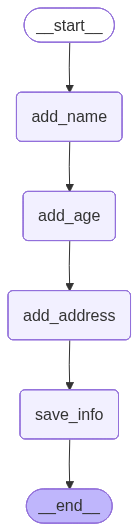

In [30]:
# 그래프(workflow) 구조를 시각화
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
print(graph.get_graph().draw_ascii())

In [23]:
# 호출 - graph.invoke(), graph.stream()
# 입력 - dictionary 로 state 에 추가할 값을 넣어서 호출. 처음 전달할 값이 없으면 빈 dict 전달

response = graph.invoke({"save_path":r"C:\documents\person_info1.txt"})

State의 type <class 'dict'>
add_name {'save_path': 'C:\\documents\\person_info1.txt'}
add_age {'save_path': 'C:\\documents\\person_info1.txt', 'name': '홍길동'}
add_address {'save_path': 'C:\\documents\\person_info1.txt', 'name': '홍길동', 'age': 30}
>>>>>>C:\documents\person_info1.txt에 입력 정보를 저장함
저장내용:>>>>>>('홍길동', 30, '서울시 금천구 독산동')


In [24]:
response #State가 반환( 각 노드들이 처리한 최종결과 state)

{'save_path': 'C:\\documents\\person_info1.txt',
 'name': '홍길동',
 'age': 30,
 'address': '서울시 금천구 독산동'}

In [ ]:
for event in graph.stream({"save_path":r"c:\temp"}, stream_mode="values"):
    print(event)

# stream_mode : "updates"(기본) -> 각 노드가 끝날 때 마다 그 노드가 state에 추가한 상태값을 반환
#               "values" - > 각 노드가 끝날 때 마다 그 시점의 state를 반환. (state의 snapshot)
#               "messages" - > LLM응답 chunk를 반환 (chatbot에서 사용)

{'save_path': 'c:\\temp'}
State의 type <class 'dict'>
add_name {'save_path': 'c:\\temp'}
{'save_path': 'c:\\temp', 'name': '홍길동'}
add_age {'save_path': 'c:\\temp', 'name': '홍길동'}
{'save_path': 'c:\\temp', 'name': '홍길동', 'age': 30}
add_address {'save_path': 'c:\\temp', 'name': '홍길동', 'age': 30}
{'save_path': 'c:\\temp', 'name': '홍길동', 'age': 30, 'address': '서울시 금천구 독산동'}
>>>>>>c:\temp에 입력 정보를 저장함
저장내용:>>>>>>('홍길동', 30, '서울시 금천구 독산동')


# 다양한 엣지

## **기본 엣지**

- 기본 엣지(Normal Edge)는 한 노드에서 다른 노드로의 직접적인 연결을 의미한다. 이는 가장 단순한 형태의 연결로, 이전 노드의 작업이 완료되면 자동으로 다음 노드로 이동한다.
- 기본 엣지는 다음과 같은 특징을 가진다:
  - **고정된 흐름**: 항상 동일한 다음 노드로 이동한다      
  - **단순한 구조**: 복잡한 조건 없이 순차적으로 실행된다      
  - **예측 가능한 동작**: 실행 전에 전체 흐름을 예측할 수 있다    

## **조건부 엣지와 라우팅**

- 조건부 엣지(Conditional Edge)는 특정 조건에 따라 다음에 실행할 노드를 동적으로 결정하는 기능이다. 이는 랭그래프의 가장 강력한 기능 중 하나로, 복잡한 의사결정 로직을 구현할 수 있게 한다.
- 조건부 엣지를 구현하기 위해서는 세 가지 구성 요소:
    1. **소스 노드(Source Node)**
       -  조건 평가가 시작될 노드의 이름이다.
    2. **조건 함수(Condition Function)**
       - 현재 상태를 입력받아 문자열을 반환하는 함수로, 다음에 실행할 노드를 결정하는 로직을 포함한다. 
    3. **조건부 엣지 매핑(Conditional Edge Mapping)**
       -  조건 함수의 반환값과 다음 노드 이름을 매핑하는 딕셔너리이다.
    ```python
    def relevance_check(state):     
        # 관련성 체크 로직    
        if state["relevance_score"] > 0.8:        
            return "grounded"    
        else:        
            return "not_grounded" 
            
    graph.add_conditional_edges(
        "llm_answer",     # 소스 노드    
        relevance_check,  # 조건 함수    
        {        
            "grounded": END,  # 조건함수반환값:이동할 노드 (grounded 이면 END(종료) 노드로 이동)
            "not_grounded": "retrieve"  # not_grounded 이면 retrieve 노드로 이동
        } 
      )
    ```

## **반복 구조**

- LangGraph 핵심 장점 중 하나는 반복 구조(순환 구조)를 지원한다는 점이다. 
- 반복 구조를 통해 특정 조건이 만족될 때까지 Node 간 전이를 순환시키거나, interrupt 이후 재개 실행까지 포함해 흐름을 반복할 수 있게 한다. 
- 반복 구조의 활용 예시:
  - **검색 품질 개선**
    - 검색 결과가 만족스럽지 않을 때 쿼리를 재작성하여 다시 검색한다      
  - **답변 품질 향상**
    - 생성된 답변의 품질이 낮을 때 다시 생성하거나 개선한다      
  - **할루시네이션 방지**
    -  답변이 검색된 문서와 관련성이 낮을 때 재생성을 요청한다

In [27]:
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
import warnings
warnings.filterwarnings(action="ignore") # 경고 메시지가 출력이 되지 않는다.

In [29]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core. messages import HumanMessage
from langchain_tavily import TavilySearch

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

from typing import Annotated
from typing_extensions import TypedDict

from datetime import date

from tools import search_wiki


In [ ]:
name: Annotated[str, "학생이름"] #변수의 타입 + 설명 추가 (typing 모듈에 있음)

In [ ]:
add_messages([HumanMessage()])

In [34]:
#State 정의
class State(TypedDict):

    messages: Annotated[list, add_messages] # list에 node 가 반환한 리스트 내용을 append 할 때.
    #Langgraph: Annotated[타입, reducer 함수] # reducer 함수 : State(dictionary)에 node 가 전달한 값을 넣는 함수.

In [35]:
# 챗봇 노드 - callable 객체
def create_chatbot_node(tools, model_name:str="gpt-5.2"):
    """tool들과 모델 이름을 받아서 toolbind 모델을 사용하는 챗봇 노드를 반환"""

    system_prompt = """당신은 다양한 지식을 제공하는 AI 어시스턴트입니다. 
    주요 목표는 사용자의 요청에 대한 정확한 정보를 이해하기 쉽게 설명하는 것입니다.

    # Instruction:    
1.정확한 답변을 위해 웹 검색이 필요하거나 최신 정보를 얻고 싶을 때는 **tavily_search** 도구를 사용하십시오. 이 도구는 인터넷 검색을 통해 정보를 검색해서 제공합니다.
2.최신 정보를 제공해야 할 때는 {today} 를 기준으로 합니다.
3.일반적인 상식이나 전문 지식이 필요한 경우, **search_wiki** 도구를 사용할 수 있습니다.
4.검색 결과를 기반으로 명확하고 간결한 답변을 제공하십시오.
5.최종 응답은 챗봇과 같은 대화형 스타일을 유지하세요. 친근하고 쉽고 자연스럽게 답변하되 전문성을 보이는 어조를 유지하세요.

    각 도구들을 결합해서 사용자의 요청에 정확한 대답을 하세요.
    항상 가장 최신의 정확한 정보를 제공하기 위해 노력하세요."""
    class Chatbot:
        
        def __init__(self, tools, model_name):
            prompt = ChatPromptTemplate(
                [
                    ("system", system_prompt),
                    ("human","{query}")
                ],
                partial_variables={"today":date.today().strftime("%Y년 %m월 %d일")}
            )
            self.chain = prompt | ChatOpenAI(model=model_name).bind_tools(tools=tools)

        def __call__(self, state: State): #Node에서 호출할 call 메소드
            #state['messages']: [AIMessage, HumaMassage, AIMessage, .....] 마지막 Message 객체를 조회
            response = self.chain.invoke({"query": state['messages'][-1]})
            return {"messages":[response]}
        
    return Chatbot(tools, model_name) #tools, model_name:create_chatbot_node() 파라미터.

In [37]:
tools=[TavilySearch(max_results=5), search_wiki]
chatbot_node = create_chatbot_node(tools)
chatbot_node

<__main__.create_chatbot_node.<locals>.Chatbot at 0x1fed49a2780>

In [33]:
chatbot_node({"messages":[HumanMessage("안녕하세요")]})

{'messages': [AIMessage(content='안녕하세요! 반갑습니다.  \n무엇을 도와드릴까요?\n\n예를 들어,\n- 궁금한 개념/용어 설명\n- 최신 뉴스·이슈 정리(필요하면 웹 검색으로 확인)\n- 공부/업무 자료 요약, 글쓰기, 번역\n- 여행/맛집/제품 비교 추천\n\n원하시는 주제나 질문을 편하게 말씀해 주세요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 1630, 'total_tokens': 1721, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5.2-2025-12-11', 'system_fingerprint': None, 'id': 'chatcmpl-CtSrUIDzntk1IYKBKDLvXyZuC6PAD', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b7d60-442d-7320-96a6-e5d18e0d6487-0', usage_metadata={'input_tokens': 1630, 'output_tokens': 91, 'total_tokens': 1721, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [47]:
# tool을 실행하는 노드
from langchain_core.messages import ToolMessage # 쌔ㅐㅣ tlfgod rufrhk aptpwl.

#AIMessage의 tool_calls 를 이용해 tool을 호출하고 그 결과를 반환.
class CustomToolNode:
    def __init__(self, tools:list):
        self.tools_by_name = {tool.name:tool for tool in tools} # {툴이름:툴객체}

    def __call__(self, state:State):
        messages = state.get('messages',[]) # State에 messages 가 없으면 빈 리스트 반환
        if messages :
            message = messages[-1]
        else:
            raise ValueError("state에 Message가 없습니다.")
        outputs = [] # Tool Calling 결과들을 담을 빈 리스트 -> [ToolMessage, ToolMessage, ...]
        for tool_call in message.tool_calls:
            #Tool을 호출 - tool 객체.invoke(tool_call)
            tool_message = self.tools_by_name[tool_call["name"]].invoke(tool_call)
            outputs.append(tool_message)

        return{"messages":outputs} #State의 messages에 추가
    
tool_node = CustomToolNode(tools)
tool_node

In [48]:
# 조건부 엣지 함수
# message 에 tool_calls 정보가 있으면 "tool_node" 반환
#                             없으면 END 를 반환

def custom_tool_condition(state:State):
    messages = state.get("messages", [])
    if messages:
        message = messages[-1]
    else:
        raise ValueError("state에 message가 없습니다.")
    if message.tool_calls and len(message.tool_calls) > 0: # AIMessage에 tool_call 정보가 있으면.
        return "tools"
    else:
        return  END

In [49]:
# StateGraph 구성
## 1. 생성
workflow = StateGraph(State)

## 2. 노드 추가
workflow.add_node("chatbot",chatbot_node)
workflow.add_node("tools", tool_node)

##3. 엣지 연결
# 사용자 질문 ->START -> chatbot - (AIMessage:tool_calls-0,X) - > tool_calls 가 있으면: tool_node
#                                                                too_calls 가 없으면 : END
workflow.add_edge(START, "chatbot")
workflow.add_conditional_edges(
    "chatbot", 
    custom_tool_condition, #chatbot 노드 결과에 따라 어디로 이동할지 경로를 반환하는 조건 함수.
    {"tools":"tools", END:END} # {조건함수가 반환한 겂: 이동할 NODE 이름}
    ) 
workflow.add_edge("tools", "chatbot") # chatbot <-(condition_endge) -> tools 반복구조

#컴파일
graph = workflow.compile()


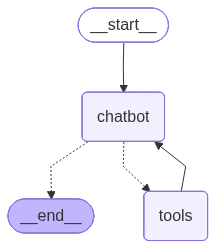

In [42]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [44]:
query = "안녕하세요."
response = graph.invoke({"messages":[("human", query)]}) #State의 messages 에 형식에 맞춰서 전달.

In [45]:
response['messages']

[HumanMessage(content='안녕하세요.', additional_kwargs={}, response_metadata={}, id='8311d8b3-74ce-40b6-87e9-ec0cc5e5455d'),
 AIMessage(content='안녕하세요! 반가워요.  \n무엇을 도와드릴까요?\n\n- 궁금한 개념/용어 설명  \n- 최신 뉴스·정보 정리(필요하면 웹 검색해서 근거와 함께)  \n- 글쓰기/요약/번역  \n- 공부·업무 문제 해결(코드, 보고서, 발표 등)\n\n원하시는 주제를 편하게 말해 주세요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 90, 'prompt_tokens': 1659, 'total_tokens': 1749, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5.2-2025-12-11', 'system_fingerprint': None, 'id': 'chatcmpl-CtUAvG01hZN1MSucy3RR0rHZgpJxN', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b7dad-4ed0-7171-b3d6-fc82e8ec7c22-0', usage_metadata={'input_tokens': 1659, 'output_tokens': 90, 'total_tokens': 1749, 'input_toke

In [50]:
query = "FiFA 월드컵에 대해 위키백과사전의 내용을 조사해서 정리해줘.."
response = graph.invoke({"messages":[("human", query)]})

In [52]:
print(response['messages'][-1].content)

올려주신 `content`는 **위키백과 검색 결과(JSON 형태)**로 보이고, 내용은 크게 2개 문서 요약입니다.

## 1) FIFA 월드컵 (FIFA World Cup)
- FIFA(국제축구연맹) 회원국들의 **국가대표팀**이 참가하는 국제 대회
- **4년마다 개최**, 첫 대회는 **1930년**
- **2차 세계대전** 때문에 **1942·1946년 대회는 미개최**
- 대회 구성: **예선(본선 약 3년 전 시작) + 본선**
- (해당 글 기준) 본선은 **32개 팀**이 약 **한 달**간 개최국에서 경쟁
- 최근 대회: **2022 카타르 월드컵**, **아르헨티나 우승**
- 다음 대회: **2026 캐나다/멕시코/미국 개최**(공동 개최)

또한 우승 관련 요약도 포함되어 있어요:
- 브라질 5회, 독일·이탈리아 4회, 아르헨티나 3회 등(글에 적힌 기준)

## 2) 2002년 FIFA 월드컵
- **2002.05.31 ~ 2002.06.30**
- **대한민국·일본 공동 개최**
- 월드컵 역사상 **처음으로 2개국 공동 개최**
- 결승: **브라질이 독일을 2–0**으로 이기고 **통산 5번째 우승**
- 대한민국은 포르투갈·이탈리아·스페인을 꺾고 **4강(준결승) 진출**(역사적 성과)

---

원하시면 이 `content` JSON을
1) 보기 좋게 표로 정리하거나  
2) 핵심만 5줄 요약하거나  
3) “질문-답변” 형태로 바꿔드릴까요?


In [53]:
query = "FiFA 월드컵에 대해 위키백과사전의 내용을 조사해서 정리해줘.."
for event in graph.stream(
    {"messages":[("human", query)]}, stream_mode="messages"
    ):

    print(event[0].content, end="")

{"result": [{"content": "FIFA 월드컵(영어: FIFA World Cup)은 축구 국제 기구인 국제 축구 연맹(FIFA)에 가맹한 축구 협회(연맹)의  축구 국가대표팀만 참가하는 국제 축구 대회이다.\n4년마다 열리는 월드컵은 1930년에 첫 대회가 열렸다. 1942년과 1946년 대회는 제2차 세계 대전으로 인하여 열리지 못했다. 대회는 예선 무대와 본선 무대 등 두 부분으로 나뉜다. 예선 무대는 본선에 진출할 32팀을 가려내기 위해 본선 보다 3년 일찍 시작한다. 현재 본선은 개최국 경기장에서 한 달 남짓 32개 팀이 우승을 놓고 경쟁하는 방식으로 진행된다. 월드컵 결승전은 세계에서 가장 많은 사람이 시청하는 단일 스포츠 경기이다. 어림잡아 7억 1,510만 명이 2006년 FIFA 월드컵 결승전을 시청했다고 한다.\n총 20번 대회가 열리는 동안 8팀이 우승을 차지했다. 가장 우승 횟수가 많은 팀은 브라질로 총 다섯 번의 우승컵을 들어올렸다. 그 다음으로 이탈리아와 독일이 네 번, 아르헨티나가 세 번, 그리고 초대 우승팀인 우루과이와 프랑스가 각각 두 차례씩, 잉글랜드와 스페인가 각각 한 차례씩 우승을 차지했다. 네덜란드는 준우승만 3번(1974·1978·2010)했다.대한민국은 4위가 최고 기록이다.(2002)\n가장 최근에 열린 2022년 FIFA 월드컵은 카타르에서 열렸고, 아르헨티나가 우승했다. 2026년은 캐나다/멕시코/미국에서 개최된다.\n세계적인 종합 스포츠 행사 중 하나인 올림픽과 달리 월드컵은 단일 종목 대회다. 그리고 올림픽은 고대 그리스의 전통을 따라 한 도시를 중심으로 개최되지만, 월드컵은 한 국가를 중심으로 열리며 대회 기간은 올림픽이 보통 2주 동안 열리는데 비해 월드컵은 약 한달 동안 진행된다.\n\n\n== 역사 ==\n\n\n=== 이전의 국제 대회들 ===\n세계 최초의 A매치는 1872년 글래스고에서 열린 스코틀랜드 대 잉글랜드의 경기였으며, 1884년에 시작된 첫 국제 대회인 브리티시 홈 챔피언십(

# LangGraph에서 메모리 관리

- **LangGraph의 메모리 관리**는 Checkpointer 저장소에 **실행 스레드(session/thread)** 단위의 **State(상태) 스냅샷**(전체 State)을 저장하고, 이후 필요할 때 다시 불러와 **그래프 실행을 중단 없이 이어가거나(HITL 등으로 중단 되었다가 재실행되어도 상태가 유지되도록한다),  특정 시점으로 복원할 수 있도록 지원하는 역할**을 말한다.
- **Checkpointer**는 그래프 세션의 **생명 주기 전반에서 상태를 지속 유지할 수 있게 하는 기반 컴포넌트**이며, 이를 통해 이전 실행 지점에서 다음 노드 실행을 재개하거나 저장된 상태를 활용할 수 있다.
  - Checkpointer는 **상태 저장소로 상태 저장, 복원의 기능을 제공** 하는 컴포넌트이다.

## 체크포인터의 주요 기능

1. **상태 지속성(State Persistence)**
   - 그래프 실행 중 특정 시점의 State(dict)를 저장하고, 이후 동일 스레드에서 다시 로드하여 실행을 이어갈 수 있게 한다.
   - 예를들어 사람의 개입이 필요해 agent 실행을 일시 멈췄다 재실행할 때 멈추기 전 상태를 그대로 유지할 수 있게 한다.

2. **대화 기록 누적 및 유지(Message Accumulation)**
   - 대화형 에이전트의 경우, `messages` 같은 state의 리스트 필드는 **Reducer(결합 함수)** 를 사용해 이전 메시지와 새 메시지를 병합(예: append)하여 저장한다. 이 메세지는 개별 workflow 호출에 대한 처리가 진행 중에만 유지된다.
   - Checkpointer는 개별 처리가 아닌 **전체 작업 시작 ~ 종료 까지 여러번에 걸친 실행 중 발생한 대화내역을 모두 저장하여** 대화 히스토리 관리가 가능하도록 하여 LLM과 멀티턴 대화가 가능하게 한다.

3. **체크포인트 기반 상태 복원(Checkpoint-based Recovery)**
   - 오류 발생 시 **이미 저장된 체크포인트 지점으로 상태를 복원할 수 있도록 한다.** 복구는 개발자가 설계한 체크포인트 지점을 기준으로 수행된다.


## 구현 방식

1. 그래프를 컴파일(compile)할 때 `checkpointer` 객체를 전달하여 연결한다.
2. 그래프를 실행(invoke/stream)할 때 `RunnableConfig.configurable` 필드에 `thread_id`를 전달해, **해당 실행 세션이 사용할 메모리 공간(저장 영역)** 을 지정한다.
3. 동일 `thread_id`를 가진 실행은 **서로 독립된 메모리 공간에서 상태를 공유**하며, 다른 `thread_id` 세션과 상태가 섞이지 않는다.

- **예제**:

  ```python
  from langgraph.checkpoint.memory import MemorySaver

  # 1. 메모리 기반 Checkpointer 생성
  checkpointer = MemorySaver()

  # 2. 그래프 compile 단계에서 Checkpointer 연결
  graph = workflow.compile(checkpointer=checkpointer)

  # 3. 그래프 실행 시 사용할 저장 스레드 ID 지정
  config = {"configurable": {"thread_id": "user-123"}}

  # 4. invoke()/stream() 호출 할 때 checkpointer 에게 전달할 thread_id 를 전달한다.
  response = graph.invoke({"messages": ["안녕하세요"]}, config=config)
  print(response)
  ```


In [54]:
class State(TypedDict):
    messages : Annotated[list, add_messages]

tools = [TavilySearch(max_results=5), search_wiki]
chatbot_node = create_chatbot_node(tools=tools)

In [55]:
# Tool Node
from langgraph.prebuilt import ToolNode # CustomtoolNode 구현한 클래스
tool_node = ToolNode(tools)

In [56]:
# 그래프 정의
from langgraph.prebuilt import tools_condition

workflow = StateGraph(State)

workflow.add_node("chatbot", chatbot_node)
workflow.add_node("tools" , tool_node)

workflow.add_edge(START, "chatbot")
workflow.add_conditional_edges(
    "chatbot",
    tools_condition, # tool_calls가 있으면 "tools"반환, 없으면 END 반환 -custom_tool_condition()을 구현한 함수
    {"tools":"tools", END:END}
)
workflow.add_edge("tools", "chatbot")


In [57]:
#Checkpointer(저장소) 는 compile시 지정
from langgraph.checkpoint.memory import MemorySaver # 메모리 이용

checkpointer = MemorySaver()

graph = workflow.compile(checkpointer=checkpointer)

In [58]:
# 챗ㅂ봇 Agent 실행
# RunnableConfig 를 이용해 대화 id를 지정 (thread-id)

config = {"configurable": {"thread-id":"user-1111"}}

query = "AI의 세가지 특징을 정의해 줘."
response = graph.invoke(
    {
        "messages":[("human", query)]
    },
    config=config
)

KeyError: 'thread_id'

In [ ]:
response

# Human In The Loop (HITL)

- **Human-In-The-Loop**(**HITL**)은 AI 시스템의 의사결정 과정에 **사람이 직접 개입하여 검증, 승인, 수정, 피드백**을 제공하는 설계 패턴이다.
- LangGraph에서의 HITL은 **그래프**(**에이전트 워크플로우**)**의 특정 노드를 실행 중단**(**pause**)하고, 그 지점에서 사람의 입력을 받아 **다음 실행 방향을 결정하거나 상태(State)를 변경**한 뒤 흐름을 이어가는 방식으로 동작한다.

## HITL의 핵심 특성

 특성              | 설명                                              |
| --------------- | --------------------------------------------------------------------------- |
| 워크플로우 일시정지      | interrupt(중단) 기능으로 그래프 실행을 특정 노드에서 멈춤           |
| 상태(State) 수정 가능 | 사람이 중간 결과를 보고 State 값을 변경할 수 있음                 |
| 승인/거절/대안 흐름 선택  | 다음 엣지(경로)를 사람이 결정할 수 있음                         |
| 체크포인트 기반 복구     | 체크포인트(checkpoint) 시스템으로 이전 실행 지점으로 되돌리거나 재실행 가능 |
| 멀티 턴 인터랙션       | 필요 시 여러 번 사람과 상호작용 가능                           |

## HITL 사용 시점(Usecase)
HITL은 **사람의 판단이 필요한 고위험(high-stakes) 순간**, **맥락 기반 검증이 중요한 경우**, 또는 **AI 단독으로는 신뢰를 완전히 담보하기 어려운 경우**에 사용한다.

1. **결과 승인**
   - AI가 생성한 답변을 사람이 확인 후 승인해야 다음 단계로 진행
   - 예: 이메일 발송 전 내용 확인, 회사 계좌로 송금하기 전 최종 승인, 프로덕션 코드 배포 전 리뷰.
2. **모호성 해결 및 명확화**
   - 사용자 요청이 모호할 때 명확히 하기 위해 확인
    - 예: "사용자가 '그거 예약해줘'라고 했는데, '그거'가 무엇인지 AI가 모를 때 사람에게 물어봄."
3. **데이터 보정(중간 결과물 수정)**
   - AI가 추출한 정보가 애매하거나 추가 데이터가 필요한 경우 사람이 직접 수정 
   - 예: AI가 작성한 블로그 초안을 사람이 검토하고 수정한 뒤, 다시 AI에게 발행을 맡길 때.
4. **정책/규제 준수 검증**
   - 예: 금융, 의료, 법률 등 도메인에서 사람 검토 필수
5. **도구 실행 전 확인**
   - 예: 이메일 발송, DB 삭제, 결제 실행 등 AI가 액션을 수행하기 전 사람 승인
6. **학습 피드백**
   - 예: 모델이 틀렸을 경우 사람이 직접 피드백을 주고 흐름 재조정

## 관련 주요 API

| API                          | 역할                                        | 사용 목적                                   |
| ---------------------------- | ------------------------------------------- | -----------------------------------------   |
| `interrupt()`                | 현재 그래프 실행을 중단하고 외부 입력을 대기| 사람의 검토/입력을 받기 위해 그래프를 멈춤  |
| `MemorySaver / Checkpointer` | 실행 지점을 저장하는 체크포인트를 반드시 사용해야 한다. | 이전 상태로 되돌리거나 중단 지점부터 재실행 하기 위해 상태가 저장되어 있어야 한다.|
| `invoke()`/`stream()`        | 그래프 실행 시작 또는 재개                  | HITL 입력 후 다시 실행                      |
| `Command(resume=...)`        | 재개 명령                                   | interrupt로 멈춘 곳에 사람의 입력값을 전달하며 실행을 다시 시작함 |
| `graph.update_state()`       | 상태(State) 수정                            | interrupt 되어 있는 동안 사람이 직접 state를 수정 할 수있게 한다.|


## 실행을 중단하는 두가지 방식
- 노드에서 `interrupt()` 를 호출 하여 명시적으로 멈춘다. (Dynamic Interrupt)
- Graph 컴파일시 `interrupt_before` 설정으로 노드를 지정하여 특정 노드가 실행하기 직전에 무조건 멈추게 한다. (Static Interrupt)
- **최신 버전에서는 Dynamic Interrupt 방식을 선호한다.**